RMSE: 291.90
R²: -0.08
Cross-validation MSE (mean): 72580.59


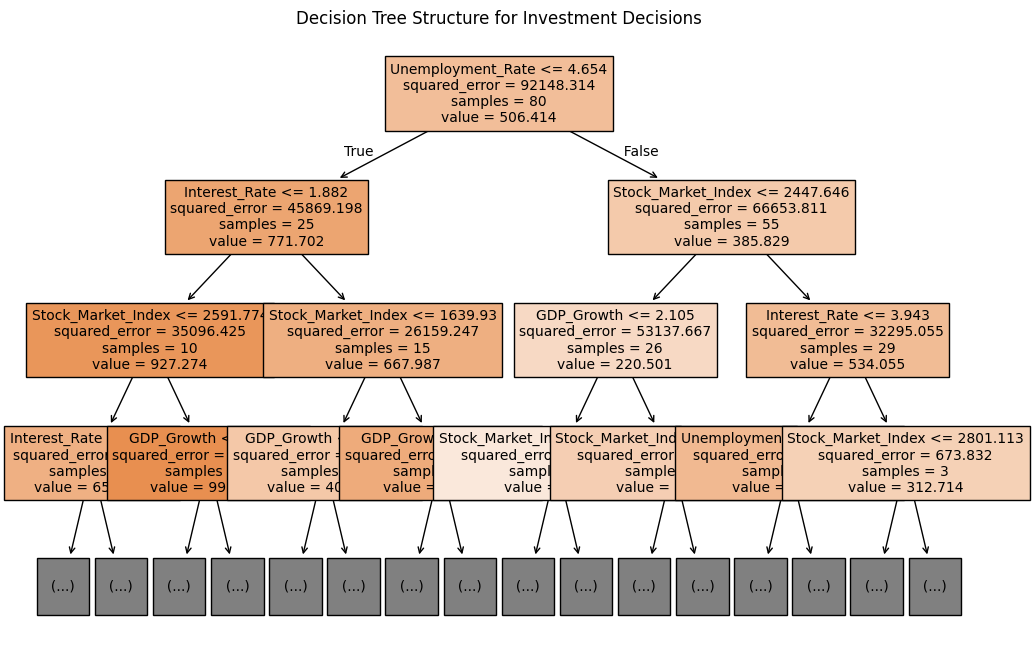

Top 3 Most Important Features:
              Feature  Importance
2   Unemployment_Rate    0.403976
3  Stock_Market_Index    0.324786
1          GDP_Growth    0.152886


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(42)

# Simulate dataset for financial investment decisions
data_size = 100
interest_rate = np.random.uniform(0, 5, data_size)  
gdp_growth = np.random.uniform(1, 5, data_size)  
unemployment_rate = np.random.uniform(2, 10, data_size)  
stock_market_index = np.random.uniform(1500, 3500, data_size)  

investment_return = 0.2 * stock_market_index + 100 * (gdp_growth) - 50 * unemployment_rate + np.random.normal(0, 200, data_size)

df = pd.DataFrame({
    'Interest_Rate': interest_rate,
    'GDP_Growth': gdp_growth,
    'Unemployment_Rate': unemployment_rate,
    'Stock_Market_Index': stock_market_index,
    'Investment_Return': investment_return
})

X = df.drop(columns=['Investment_Return'])
y = df['Investment_Return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
cross_val = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print essential metrics
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Cross-validation MSE (mean): {-cross_val.mean():.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title("Decision Tree Structure for Investment Decisions")
plt.show()

# Display top 3 most important features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(3)

print("Top 3 Most Important Features:")
print(feature_importance)
